In [1]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
print('numpy version : ', np.__version__)
print('pandas version : ', pd.__version__)
print('seaborn version : ', sns.__version__)

numpy version :  1.20.1
pandas version :  1.2.2
seaborn version :  0.11.0


In [4]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style('whitegrid')
sns.color_palette('dark')
plt.style.use('fivethirtyeight')

# Classification

In [14]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
data.head(5)

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
data = data.dropna()
data.columns = ['sepal length','sepal width','petal length','petal width','target']
print(data.shape)
data.head()

(150, 5)


,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Data Pre-processing

In [18]:
feats = ['sepal length','sepal width','petal length','petal width']
X = data[feats].values
y = data['target'].values

In [19]:
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [20]:
new_df = pd.DataFrame(data = X_std, columns = feats)
new_df.describe()

,sepal length,sepal width,petal length,petal width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-2.775558e-16,-5.140333e-16,1.154632e-16,9.251859e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


### Applying PCA to get Principle Components

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca.fit(X_std)
pcs = pca.transform(X_std)

pdf = pd.DataFrame(data = pcs, columns = ['pc1','pc2','pc3','pc4'])
pdf['target'] = y
pdf.describe()

,pc1,pc2,pc3,pc4
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,2.797762e-16,7.977415e-17,6.439294e-17,-6.420790e-17
std,1.711828e+00,9.630180e-01,3.851522e-01,1.440348e-01
min,-2.774170e+00,-2.658063e+00,-8.609268e-01,-4.692144e-01
25%,-2.121636e+00,-5.946612e-01,-2.577334e-01,-8.981511e-02
50%,4.145452e-01,8.434525e-03,2.392632e-02,-5.492265e-03
75%,1.342582e+00,5.878221e-01,2.006836e-01,6.713620e-02
max,3.309141e+00,2.722371e+00,1.004111e+00,4.884040e-01


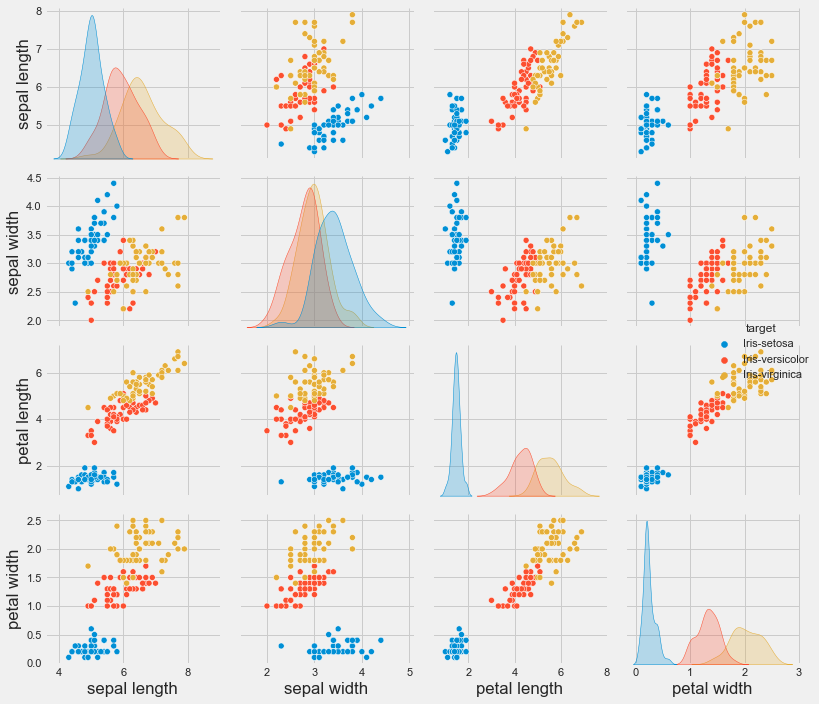

In [22]:
sns.pairplot(data=data, hue='target', diag_kind='kde')
plt.tight_layout()

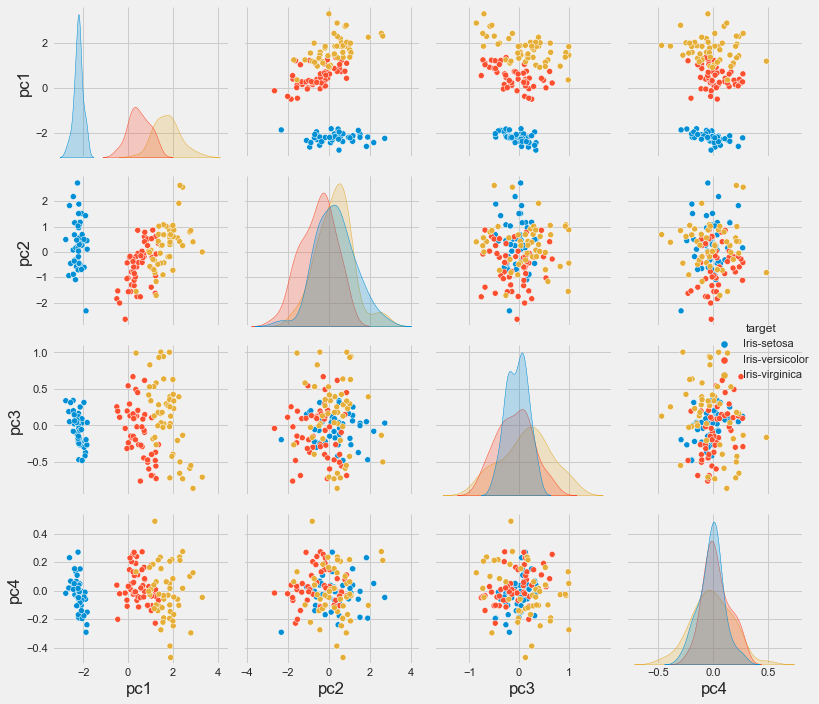

In [23]:
sns.pairplot(data=pdf, hue='target', diag_kind='kde')
plt.tight_layout()

### Skree Plot

In [25]:
print('Explained variance:', pca.explained_variance_)
print('Explained variance ratio:', pca.explained_variance_ratio_)

Explained variance: [2.93035378 0.92740362 0.14834223 0.02074601]
Explained variance ratio: [0.72770452 0.23030523 0.03683832 0.00515193]


In [27]:
pca.explained_variance_ / np.sum(pca.explained_variance_)

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

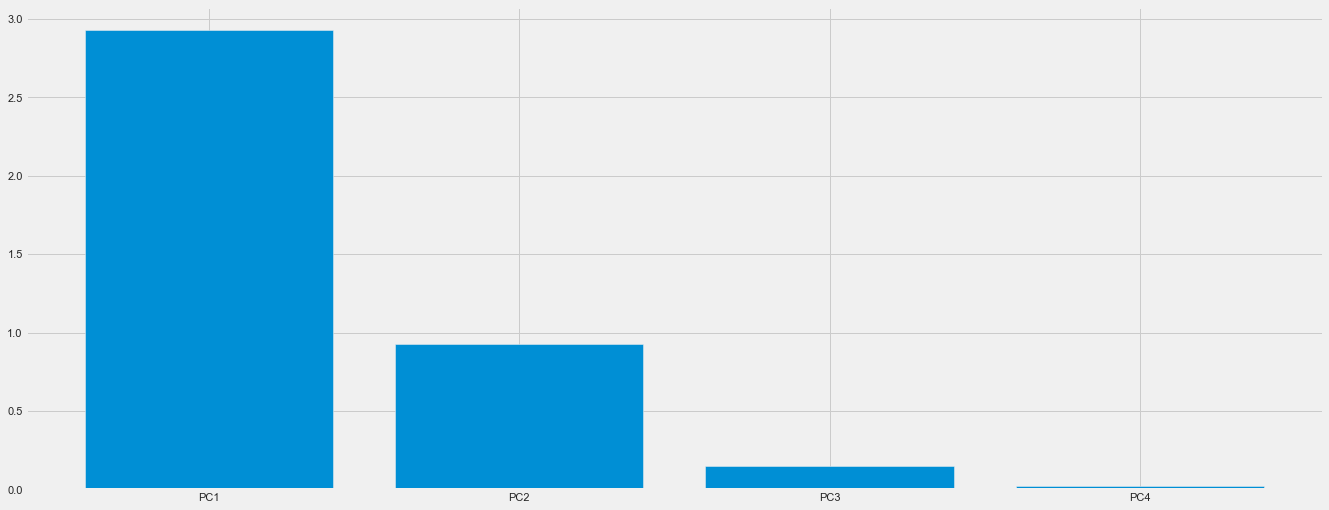

In [29]:
plt.bar(['PC1','PC2','PC3','PC4'], pca.explained_variance_)
plt.show()

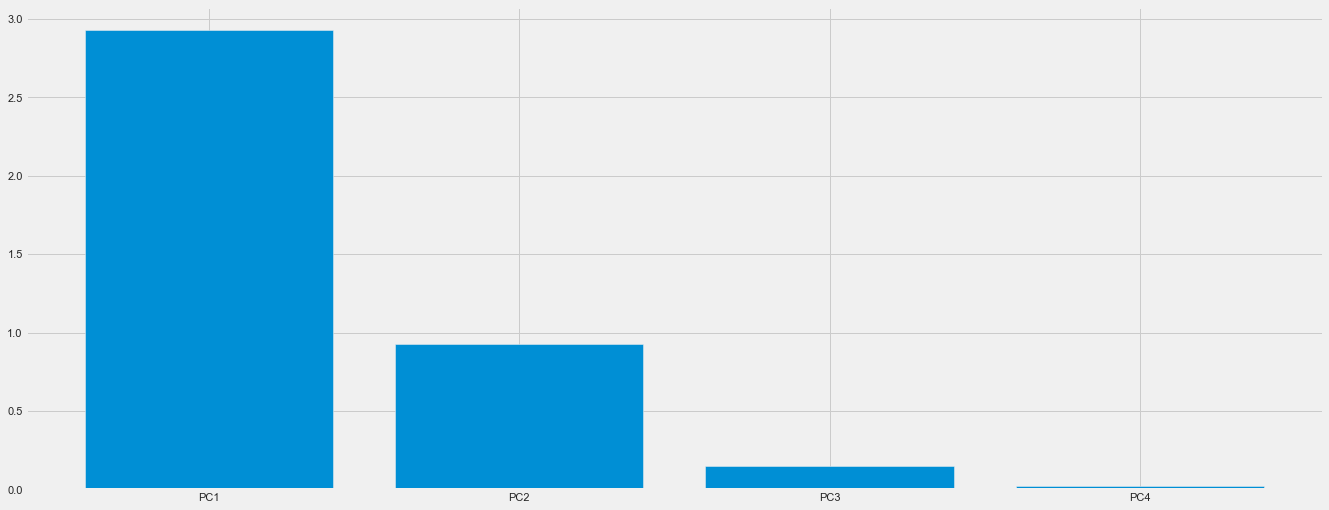

In [31]:
plt.bar(['PC1','PC2','PC3','PC4'], pca.explained_variance_)
plt.show()

### Feature Reduction

In [37]:
pca = PCA(n_components=2)
pca.fit(X_std)
pcs = pca.transform(X_std)

In [38]:
X_std_pca = pd.DataFrame(data=pcs, columns=['pc1','pc2'])
X_std_pca['target'] = y
X_std_pca.head()

,pc1,pc2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
